In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

1 Physical GPUs, 1 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# LGCN model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`


+ There will be a tensorflow error: ValueError: Unable to create group (name already exists), and it is fixed in tensorflow version >=2.2,
so use `train_v1` instead.
+ Besides, there may be another error: 
```
# UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above. [[node model_18/lg_convolution/conv1/conv1d (defined at Graphgallery/graphgallery/nn/layers/lgcn.py:109) ]] [Op:__inference_train_on_batch_108066]
```
You can fix it using:
```python
graphgallery.set_memory_growth()
```

In [6]:
from graphgallery.nn.models import LGCN
model = LGCN(adj, x, labels, device='GPU', norm_x='l1', seed=123)
model.build()
# train with validation
his = model.train_v1(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train_v1(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


loss 1.48, acc 86.43%, val_loss 1.82, val_acc 75.60%: 100%|██████████| 100/100 [00:12<00:00, 11.36it/s]


Test loss 1.6544, Test accuracy 83.10%


## Show model summary

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attributes (InputLayer)         [(None, 1433)]       0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1433)         0           attributes[0][0]                 
__________________________________________________________________________________________________
adj_matrix (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
dense_graph_conv (DenseGraphCon (None, 32)           45856       dropout[0][0]                    
                                                                 adj_matrix[0][0]             

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+-----------------------------+
|    Parameters     |            Value            |
+===================+=============================+
| Name              | LGCN                        |
+-------------------+-----------------------------+
| as_model          | False                       |
+-------------------+-----------------------------+
| early_stop_metric | val_loss                    |
+-------------------+-----------------------------+
| early_stopping    | None                        |
+-------------------+-----------------------------+
| epochs            | 100                         |
+-------------------+-----------------------------+
| monitor           | val_acc                     |
+-------------------+-----------------------------+
| save_best         | True                        |
+-------------------+-----------------------------+
| verbose           | 1                           |
+-------------------+-----------------------------+
| weight_pat

In [9]:
# show model parameters
model.show('model')

+-------------+--------------------------+
| Parameters  |          Value           |
+=============+==========================+
| Name        | LGCN                     |
+-------------+--------------------------+
| activations | [None, None, None]       |
+-------------+--------------------------+
| dropouts    | [0.8, 0.8]               |
+-------------+--------------------------+
| hiddens     | [32]                     |
+-------------+--------------------------+
| k           | 8                        |
+-------------+--------------------------+
| l2_norms    | [0.0005, 0.0005, 0.0005] |
+-------------+--------------------------+
| lr          | 0.100                    |
+-------------+--------------------------+
| n_filters   | [8, 8]                   |
+-------------+--------------------------+
| use_bias    | False                    |
+-------------+--------------------------+


In [10]:
# By defaule, show all
model.show()

+-------------------+-----------------------------+
|    Parameters     |            Value            |
+===================+=============================+
| Name              | LGCN                        |
+-------------------+-----------------------------+
| activations       | [None, None, None]          |
+-------------------+-----------------------------+
| as_model          | False                       |
+-------------------+-----------------------------+
| device            | GPU                         |
+-------------------+-----------------------------+
| dropouts          | [0.8, 0.8]                  |
+-------------------+-----------------------------+
| early_stop_metric | val_loss                    |
+-------------------+-----------------------------+
| early_stopping    | None                        |
+-------------------+-----------------------------+
| epochs            | 100                         |
+-------------------+-----------------------------+
| hiddens   

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


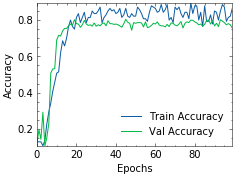

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

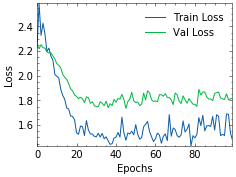

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    